In [1]:
import pandas as pd
import numpy as np

In [2]:
classes: set[str] = {"setosa", "versicolor", "virginica"}
measurements_columns_names: list[str] = ["sepallength", "sepalwidth", "petallength", "petalwidth"]
iris_data: pd.DataFrame = pd.read_csv(
	"iris.csv",
	na_values={"NA", "-", "n/a", "na"},
	dtype={
		"sepallength": np.float64,
		"sepalwidth": np.float64,
		"petallength": np.float64,
		"petalwidth": np.float64,
		"class": pd.CategoricalDtype(categories=classes),
	}
)
iris_data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from sklearn.preprocessing import StandardScaler
std_iris_data: pd.DataFrame = iris_data.copy()
scaler: StandardScaler = StandardScaler()
for columnName in measurements_columns_names:
	std_iris_data[columnName] = scaler.fit_transform(iris_data[columnName].values.reshape(-1, 1))

std_iris_data


,sepallength,sepalwidth,petallength,petalwidth,class
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,virginica
146,0.553333,-1.281972,0.705893,0.922064,virginica
147,0.795669,-0.124958,0.819624,1.053537,virginica
148,0.432165,0.800654,0.933356,1.447956,virginica


In [4]:
from sklearn.decomposition import PCA
pca: PCA = PCA(n_components=2)
principal_components = pca.fit_transform(
	std_iris_data[measurements_columns_names].values
)
principal_df: pd.DataFrame = pd.DataFrame(
	data=principal_components,
	columns=["pc 1", "pc 2"],
)
principal_df = pd.concat([principal_df, std_iris_data["class"]], axis=1)
principal_df

,pc 1,pc 2,class
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


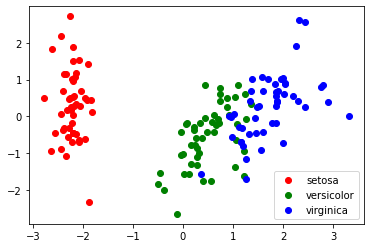

In [5]:
import matplotlib.pyplot as plt
fig: plt.Figure = plt.figure()
ax: plt.Axes = fig.add_subplot(111)

color_by_class: dict[str, str] = {
	"setosa": "red",
	"versicolor": "green",
	"virginica": "blue",
}
groups = principal_df.groupby("class")
for name, group in groups:
	ax.scatter(
		group["pc 1"],
		group["pc 2"],
		color=color_by_class[name],
		label=name,
	)
ax.legend()
plt.show()
